In [193]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly as pl
import scipy.optimize as opt
from scipy.io import loadmat
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl


In [2]:
data=loadmat('machine-learning-ex7\ex7\ex7data2.mat')

In [3]:
X=data['X']

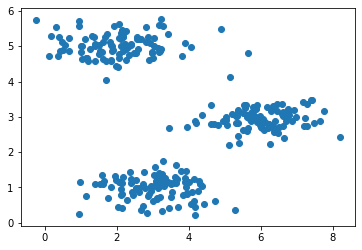

In [4]:
plt.scatter(X[:,0],X[:,1])

In [317]:
def findclosestcentroids(X,ini_cent):
    K=len(ini_cent)
    idx= np.zeros([X.shape[0],1],dtype=int)
    for i in range(len(X)):
        val=(X[i,:])
        j=np.sqrt(np.sum(np.square(val-ini_cent),axis=1))
        idx[i]=np.argmin(j)
    return idx

In [319]:
def runkmeans(X,ini_cent,max_iters,plot_progress):
    m,n=X.shape
    K=len(ini_cent)
    centroids=ini_cent
    prev_cent=centroids
    idx=np.zeros((K,n))
    
    for i in range(max_iters):
        #print('K menas iteration',i,max_iters)
        idx= findclosestcentroids(X,centroids)
        
        if plot_progress:
            plotprogesskmeans(X,centroids,prev_cent,idx,K,i)
            prev_cent=centroids
            
        
        centroids=computecentroids(X,idx,K)
    return idx,centroids

In [18]:
def plotprogesskmeans(X,centroids,prev_cent,idx,K,i):
    plt.scatter(X[:,0],X[:,1],marker='o')
    #plot the history with centroidlines
    for j in range (len(centroids)):
        plt.plot(centroids[:,0],centroids[:,1],'x', ms=10, mec='k', mew=3)
        plt.plot([centroids[j][0],prev_cent[j][0]],[centroids[j][1],prev_cent[j][1]],'--',ms='30',mew=30,mec='r')
    plt.title('iterations number '+str(i))
        
    

In [284]:
def randomcentinit(X,K):
    init_cent=np.array([])
    a=np.arange(len(X))
    np.random.shuffle(a)
    for each in a[0:K]:
        init_cent=np.append(init_cent,X[each].reshape(1,X.shape[1]))
    init_cent=init_cent.reshape(K,X.shape[1])
    return init_cent
    

In [323]:
def computecentroids(X,idx,K):
    m,n=X.shape
    centroids=np.zeros((K,n))
    for i in range(len(centroids)):
        mask=idx==i
        mask=mask.reshape(len(mask))
        centroids[i]=np.mean(X[mask,:],axis=0)
    return centroids

[[6.03366736 3.00052511]
 [3.04367119 1.01541041]
 [1.95399466 5.02557006]]


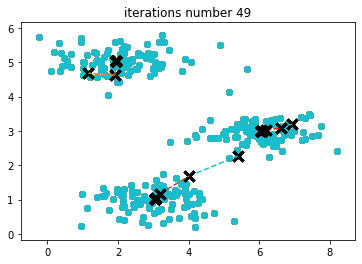

In [186]:
#settinf intial centroids and number of centroids
#ini_cent = np.array([[3, 3], [6, 2], [8, 5]])

K=3
ini_cent=randomcentinit(X,K)
#idx= findclosestcentroids(X,ini_cent)
#centroids=computecentroids(X,idx,K)

idx,centroids=runkmeans(X,ini_cent,50,True)
print(centroids)

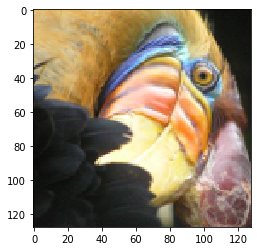

In [220]:
#Image compression using K-means

A=mpl.image.imread('machine-learning-ex7\ex7\small.png')
plt.imshow(A)

In [221]:
# divide by 255 so that all values are in range
A=A/255

In [246]:
img_size=A.shape
img_size
X=A.reshape(img_size[0]*img_size[1],3)

In [282]:
print(X.shape)

(16384, 3)


In [327]:
K=16
max_iters=10
init_cent=randomcentinit(X,K)
idx,centroids=runkmeans(X,init_cent,max_iters,False)

In [344]:
X_recovered=centroids[idx].reshape(A.shape)

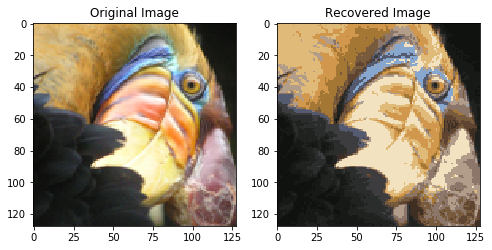

In [359]:
#plot both the images
fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(A*255)
ax[0].set_title('Original Image')
ax[0].grid(False)

#recovered image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Recovered Image')
ax[1].grid(False)